In [1]:
import unicodecsv
import seaborn as sns

def read_csv(filename):
    with open (filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('enrollments.csv') 
daily_engagement = read_csv('daily_engagement.csv') 
project_submissions = read_csv('project_submissions.csv') 



print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

    

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


# 7修正数据类型

In [2]:
from datetime import datetime as dt
# if  there is no date given ,returns None
def parse_date(date):
    if date =='':
        return None
    else:
        return dt.strptime( date , '%Y-%m-%d')



# takes a string which is  either an empty  string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i =='':
        return None
    else:
        return int(i)    
    
# clean up the data  types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [3]:
#clean up the data in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = int(float(engagement_record['total_minutes_visited']))
    engagement_record['utc_date'] = parse_date( engagement_record['utc_date'])
 

daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [4]:
#clean up the data types in the submission table

for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])


# 9  调查数据

In [5]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [6]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [7]:
len(enrollments)

1640

In [8]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [9]:
len(daily_engagement)

136240

In [10]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [11]:
len(project_submissions)

3642

In [12]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [13]:
daily_engagement[0]['account_key']

u'0'

# 11 缺失的参与记录

In [14]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in  unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


# 12 核查更多问题记录

In [15]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students  and enrollment['join_date'] != enrollment['cancel_date']):
        
        print enrollment
        num_problem_students += 1
num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

# 13 找出剩余问题

In [16]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [17]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data


In [18]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


# 14 提炼问题 

In [19]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]): 
            # 同一个同学可以多次注册，所以多一个检查代码：当 账户值不存在，或者注册日期比原有日期近时，我才把注册日期添加到字典中
            paid_students[account_key] = enrollment_date
                            
len(paid_students)
        

995

# 15 获得第一周数据

In [20]:
# Takes a student's join date and the date of a specific engagement record, 
# and returns True if that engagement record happened wihtin one week of
# the student joining.

def within_one_week(join_data, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0


In [21]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)


print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)


# 第20课：第一周的访问数，第2种解法：创建 has_visited
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0


paid_engagement_in_first_week =[]
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

# create a list of rows from the engagement  table including only rows where the student is 
# one of the paid students you  just found, and the data is wihtin one week of the student's
# join date.

len(paid_engagement_in_first_week)

1293
134549
3618


6919

# 17 探索学员参与度

In [22]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [23]:
total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [24]:
total_minutes = total_minutes_by_account.values()

import numpy as np

print 'Mean:',np.mean(total_minutes)
print 'Standard deviation:',np.std(total_minutes)
print 'Minimum:',np.min(total_minutes)
print 'Maxmum:',np.max(total_minutes)

Mean: 305.285427136
Standard deviation: 412.107180939
Minimum: 0
Maxmum: 3562


In [25]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student #最大分钟数的学生

max_minutes
student_with_max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record
    
    


{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13

# 19. 第一周完成的课程

#  第一周学生学习分钟数的更好的代码1

In [26]:

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

# print engagement_by_account

In [27]:
def  sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key,data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')


In [28]:
import numpy as np

def describe_data(data):
    
    print 'Mean:',np.mean(data)
    print 'Standard deviation:',np.std(data)
    print 'Minimum:',np.min(data)
    print 'Maxmum:',np.max(data)
    
describe_data(total_minutes_by_account.values())

Mean: 305.285427136
Standard deviation: 412.107180939
Minimum: 0
Maxmum: 3562


# 第一周完成的课程

In [29]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')

describe_data(lessons_completed_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maxmum: 36


# 20 第一周的访问数

In [30]:
# 解法1：修改sum_grouped_items1
def  sum_grouped_items1(grouped_data, field_name):
    summed_data = {}
    for key,data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            if data_point[field_name] > 0:
                total += 1
            summed_data[key] = total
        
    return summed_data

#total_days_by_account = sum_grouped_items1(engagement_by_account, 'num_courses_visited')
#describe_data(total_days_by_account.values())

In [31]:
# 解法2：has_visited
total_days_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(total_days_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maxmum: 7


# 21 划分及格学员

In [32]:
#  通过学生的集合
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if ((project in subway_project_lesson_keys) and 
       (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)


647

In [33]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


# 22 比较两组学员

passing   Lessons completed:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
------------------------------------------------
non——passing   Lessons  completed:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


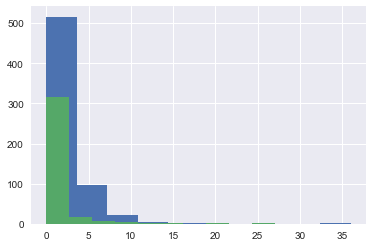

In [42]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account  = group_data(non_passing_engagement,'account_key')

print  "passing   Lessons completed:"
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(passing_lessons.values())
print  "------------------------------------------------"
print  "non——passing   Lessons  completed:"
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(non_passing_lessons.values())


 passing   minutes spent:
Mean: 392.904173107
Standard deviation: 447.62221192
Minimum: 0
Maximum: 3562
------------------------------------------------
non_passing   minutes  spent:
Mean: 142.385057471
Standard deviation: 268.80340636
Minimum: 0
Maximum: 1765


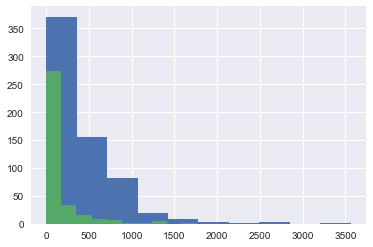

In [39]:
print  "passing   minutes spent:"
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())
print  "------------------------------------------------"
print  "non_passing   minutes  spent:"
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())

passing   days visited:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
------------------------------------------------
non——passing   days visited:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


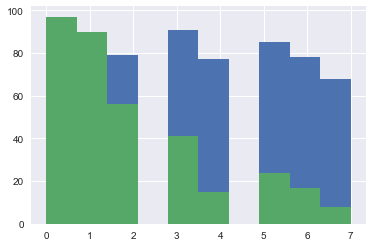

In [40]:
print  "passing   days visited:"
passing_days = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_days.values())
print  "------------------------------------------------"
print  "non——passing   days visited:"
non_passing_days = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_days.values())


# 23 创建直方图  ????


In [41]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

#summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)


Populating the interactive namespace from numpy and matplotlib


Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


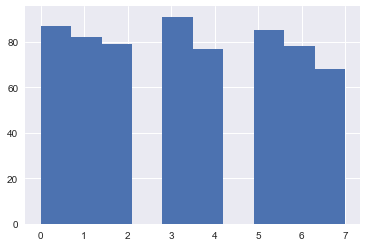

In [43]:
describe_data(passing_days.values())

# 28  改善图形，分享心得

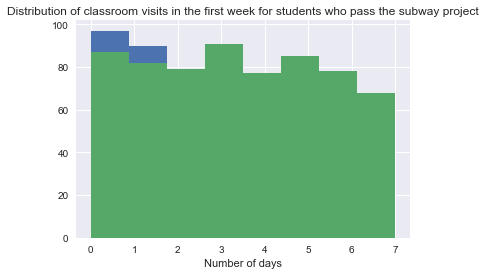

In [46]:
plt.hist(non_passing_days.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_days.values(), bins=8 )
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' +
         'for students who pass the subway project')

#  NumPy 和 Pandas 中的一维数据

In [3]:
import unicodecsv
def read_csv(filename):
    with open(filename, 'rb') as f :
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
daily_engagement = read_csv('daily_engagement.csv')

In [7]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['acct'])
    return unique_students

unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [8]:
import pandas as pd

In [9]:
daily_engagement = pd.read_csv('daily_engagement_full.csv')

In [10]:
len(daily_engagement['acct'].unique())

1237